In [1]:
import pandas as pd
import numpy as np

In [2]:
#importing the dataset
data = pd.read_csv("../data/Dataset_maternal_mental_health_infant_sleep.csv", sep=',', encoding='latin-1')
data.head()

,Participant_number,Type_parents,Birth_1mth_M_inclusion,Birth_12mth_M_inclusion,Age,Marital_status,Marital_status_Autre,Marital_status_edit,Education,Gestationnal_age,...,IBQ_R_VSF_10_bb1,IBQ_R_VSF_16_bb1,IBQ_R_VSF_17_bb1,IBQ_R_VSF_28_bb1,IBQ_R_VSF_29_bb1,IBQ_R_VSF_32_bb1,IBQ_R_VSF_33_bb1,Sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,...,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,...,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,...,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,...,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,...,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1,4


In [3]:
data.shape

(410, 64)

In [4]:
# checking names the missing values for all the columns
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.width', None)
round(data.isna().sum()/len(data),4)*100

Participant_number             0.00
Type_parents                   0.00
Birth_1mth_M_inclusion         0.00
Birth_12mth_M_inclusion        0.00
Age                            0.00
Marital_status                 0.00
Marital_status_Autre          99.51
Marital_status_edit            0.00
Education                      0.00
Gestationnal_age               0.00
Type_pregnancy                 0.00
sex_baby1                      0.00
CBTS_M_3                       0.00
CBTS_M_4                       0.00
CBTS_M_5                       0.00
CBTS_M_6                       0.00
CBTS_M_7                       0.00
CBTS_M_8                       0.00
CBTS_M_9                       0.00
CBTS_M_10                      0.00
CBTS_M_11                      0.00
CBTS_M_12                      0.00
CBTS_13                        0.00
CBTS_14                        0.00
CBTS_15                        0.00
CBTS_16                        0.00
CBTS_17                        0.00
CBTS_18                     

In [5]:
# lowering the headers of the columns
data.columns = data.columns.str.lower()
data.head()

,participant_number,type_parents,birth_1mth_m_inclusion,birth_12mth_m_inclusion,age,marital_status,marital_status_autre,marital_status_edit,education,gestationnal_age,type_pregnancy,sex_baby1,cbts_m_3,cbts_m_4,cbts_m_5,cbts_m_6,cbts_m_7,cbts_m_8,cbts_m_9,cbts_m_10,cbts_m_11,cbts_m_12,cbts_13,cbts_14,cbts_15,cbts_16,cbts_17,cbts_18,cbts_19,cbts_20,cbts_21,cbts_22,epds_1,epds_2,epds_3,epds_4,epds_5,epds_6,epds_7,epds_8,epds_9,epds_10,hads_1,hads_3,hads_5,hads_7,hads_9,hads_11,hads_13,child_survey_participation,age_bb,ibq_r_vsf_3_bb1,ibq_r_vsf_4_bb1,ibq_r_vsf_9_bb1,ibq_r_vsf_10_bb1,ibq_r_vsf_16_bb1,ibq_r_vsf_17_bb1,ibq_r_vsf_28_bb1,ibq_r_vsf_29_bb1,ibq_r_vsf_32_bb1,ibq_r_vsf_33_bb1,sleep_night_duration_bb1,night_awakening_number_bb1,how_falling_asleep_bb1
0,1,1,1,1,34,2,NaN,2,5,37.0,1,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,2,0,2,0,0,1,1,2,2,1,1,2,0,2,2,0,2,1,2,2,0,1,1,1,1,6.0,NaN,7.0,NaN,7.0,NaN,NaN,7.0,6.0,NaN,10:00,3,2
1,2,1,1,1,33,2,NaN,2,5,42.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,1,3,1.0,4.0,2.0,2.0,3.0,2.0,2.0,2.0,3.0,4.0,11:00,0,4
2,3,1,1,1,37,2,NaN,2,5,41.0,1,1,0,0,1,0,0,0,0,0,0,1,1,0,0,0,2,0,2,0,2,0,1,0,2,1,0,2,0,1,1,0,2,1,1,2,0,3,0,1,1,1.0,NaN,NaN,4.0,4.0,3.0,1.0,4.0,NaN,NaN,12:00,1,2
3,4,1,1,1,31,2,NaN,2,5,37.5,1,2,0,0,1,1,1,0,0,1,1,1,2,0,1,0,1,0,2,0,2,0,1,1,2,2,2,2,2,2,1,1,1,3,3,1,2,2,1,1,3,2.0,5.0,2.0,1.0,3.0,NaN,NaN,NaN,5.0,NaN,11:00,2,1
4,5,1,1,1,36,1,NaN,1,5,40.0,1,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,0,2,0,0,0,0,1,0,0,1,0,1,0,1,3,2.0,6.0,2.0,4.0,2.0,2.0,4.0,5.0,6.0,6.0,10:30,1,4


In [6]:
# droping 37 columns that describe the maternal health according to 3 questionnaires, 
# and "Marital_staus_autre" column that had 99.5% of Nan
import re

pattern1 = "(cbts_|cbts_m_)\d?"
pattern2 = "epds_\d?"
pattern3 = "hads_\d?"
pattern4 = "marital_status_autre"

cols_to_drop = data.filter(regex = pattern1 + "|" + pattern2 + "|" + pattern3 + "|" + pattern4).columns

data =data.drop(columns=cols_to_drop)
data.shape

(410, 26)

In [7]:
# All the missing values in our reduced dataset are from the questions related to Infant Behavior Questionnaire. 
# I have to fill this values because I want to use this vars for exploratory data analysis.

In [8]:
# One column in a dataset identifies if the participant wanted to take part in the optional part of the survey. I want to check
# if the missing values are related to answering "NO" to this question. 
# However, all the answers are positive. THerefore I will fill the missing values
data["child_survey_participation"].value_counts()

child_survey_participation
1    410
Name: count, dtype: int64

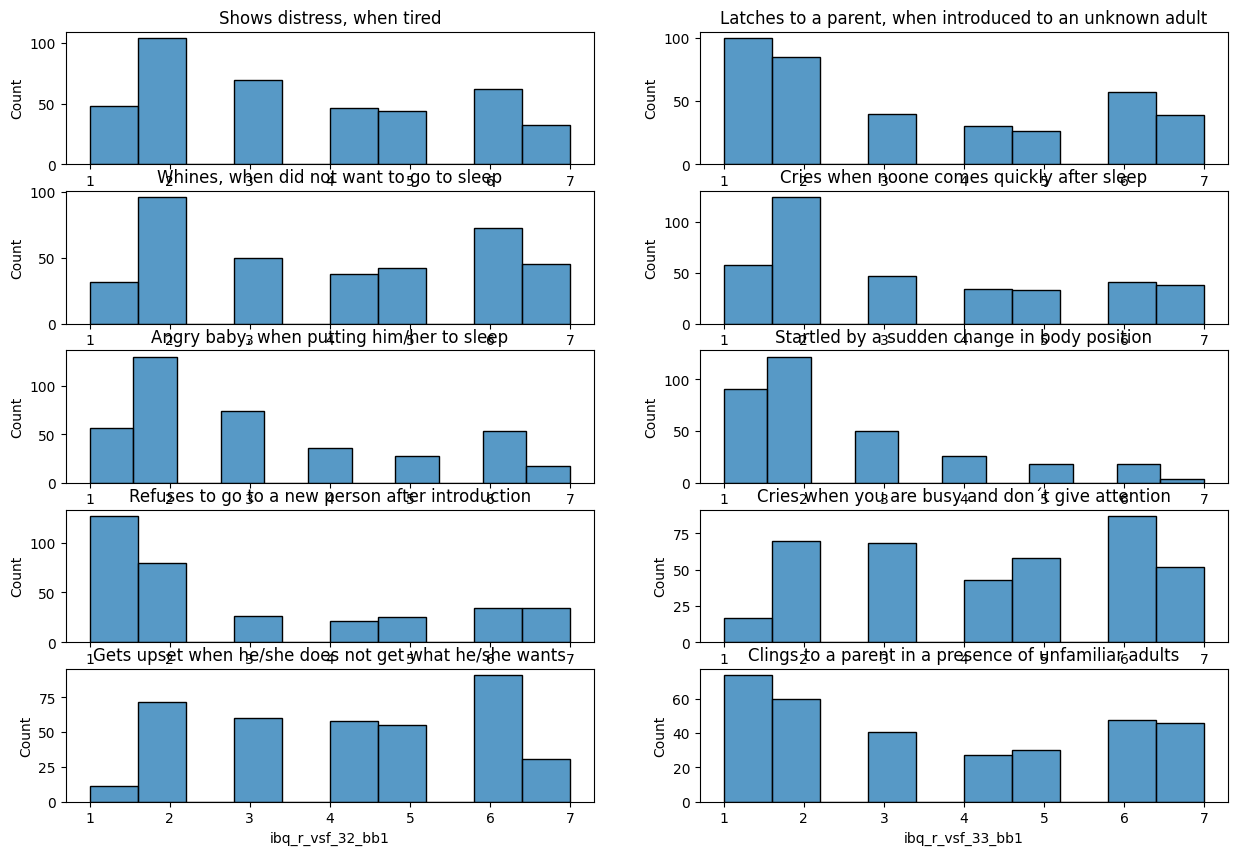

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(5,2, figsize=(15,10))
sns.histplot(x="ibq_r_vsf_3_bb1", data = data, ax = ax[0,0])
ax[0,0].set_title("Shows distress, when tired")
sns.histplot(x="ibq_r_vsf_4_bb1", data = data, ax = ax[0,1])
ax[0,1].set_title("Latches to a parent, when introduced to an unknown adult")
sns.histplot(x="ibq_r_vsf_9_bb1", data = data, ax = ax[1,0])
ax[1,0].set_title("Whines, when did not want to go to sleep")
sns.histplot(x="ibq_r_vsf_10_bb1", data = data, ax = ax[1,1])
ax[1,1].set_title("Cries when noone comes quickly after sleep")
sns.histplot(x="ibq_r_vsf_16_bb1", data = data, ax = ax[2,0])
ax[2,0].set_title("Angry baby, when putting him/her to sleep")
sns.histplot(x="ibq_r_vsf_17_bb1", data = data, ax = ax[2,1])
ax[2,1].set_title("Startled by a sudden change in body position")
sns.histplot(x="ibq_r_vsf_28_bb1", data = data, ax = ax[3,0])
ax[3,0].set_title("Refuses to go to a new person after introduction")
sns.histplot(x="ibq_r_vsf_29_bb1", data = data, ax = ax[3,1])
ax[3,1].set_title("Cries when you are busy and don´t give attention")
sns.histplot(x="ibq_r_vsf_32_bb1", data = data, ax = ax[4,0])
ax[4,0].set_title("Gets upset when he/she does not get what he/she wants")
sns.histplot(x="ibq_r_vsf_33_bb1", data = data, ax = ax[4,1])
ax[4,1].set_title("Clings to a parent in a presence of unfamiliar adults")
plt.show()

In [10]:
from sklearn.impute import KNNImputer

In [11]:
data.dtypes
# all the ibq vars are float, they can be used for knn method to replace Nan values

participant_number              int64
type_parents                    int64
birth_1mth_m_inclusion          int64
birth_12mth_m_inclusion         int64
age                             int64
marital_status                  int64
marital_status_edit             int64
education                       int64
gestationnal_age              float64
type_pregnancy                  int64
sex_baby1                       int64
child_survey_participation      int64
age_bb                          int64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
ibq_r_vsf_28_bb1              float64
ibq_r_vsf_29_bb1              float64
ibq_r_vsf_32_bb1              float64
ibq_r_vsf_33_bb1              float64
sleep_night_duration_bb1       object
night_awakening_number_bb1      int64
how_falling_asleep_bb1          int64
dtype: objec

In [ ]:
#I have to replace Nan values in 10 columns. I am doing it one by one.

In [13]:
imputer = KNNImputer(n_neighbors=5)

X_ibq_r_vsf_3_bb1 = data.drop(['ibq_r_vsf_4_bb1','ibq_r_vsf_9_bb1','ibq_r_vsf_10_bb1','ibq_r_vsf_16_bb1', 'ibq_r_vsf_17_bb1',
                              'ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1',
                              "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_3_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_3_bb1)
X_ibq_r_vsf_3_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_3_bb1_inputed_np, columns=X_ibq_r_vsf_3_bb1.columns, index=X_ibq_r_vsf_3_bb1.index)
X_ibq_r_vsf_3_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
how_falling_asleep_bb1        float64
dtype: object

In [14]:
X_ibq_r_vsf_3_bb1_inputed_df["ibq_r_vsf_3_bb1"].unique()

array([6. , 1. , 2. , 7. , 4. , 3. , 5. , 2.2, 2.8, 4.4])

In [15]:
X_ibq_r_vsf_3_bb1_inputed_df['ibq_r_vsf_3_bb1'] = X_ibq_r_vsf_3_bb1_inputed_df['ibq_r_vsf_3_bb1'].apply(lambda x: int(round(x)))

In [16]:
X_ibq_r_vsf_3_bb1_inputed_df["ibq_r_vsf_3_bb1"].unique()

array([6, 1, 2, 7, 4, 3, 5], dtype=int64)

In [17]:
data.loc[:,'ibq_r_vsf_3_bb1'] = X_ibq_r_vsf_3_bb1_inputed_df['ibq_r_vsf_3_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                8.05
ibq_r_vsf_9_bb1                8.29
ibq_r_vsf_10_bb1               8.54
ibq_r_vsf_16_bb1               3.90
ibq_r_vsf_17_bb1              19.76
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [18]:
X_ibq_r_vsf_4_bb1 = data.drop(['ibq_r_vsf_9_bb1','ibq_r_vsf_10_bb1','ibq_r_vsf_16_bb1', 'ibq_r_vsf_17_bb1',
                              'ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1',
                              "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_4_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_4_bb1)
X_ibq_r_vsf_4_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_4_bb1_inputed_np, columns=X_ibq_r_vsf_4_bb1.columns, index=X_ibq_r_vsf_4_bb1.index)
X_ibq_r_vsf_4_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
how_falling_asleep_bb1        float64
dtype: object

In [19]:
X_ibq_r_vsf_4_bb1_inputed_df['ibq_r_vsf_4_bb1'] = X_ibq_r_vsf_4_bb1_inputed_df['ibq_r_vsf_4_bb1'].apply(lambda x: int(round(x)))

In [20]:
X_ibq_r_vsf_4_bb1_inputed_df["ibq_r_vsf_4_bb1"].unique()

array([5, 4, 6, 1, 7, 2, 3], dtype=int64)

In [21]:
data.loc[:,'ibq_r_vsf_4_bb1'] = X_ibq_r_vsf_4_bb1_inputed_df['ibq_r_vsf_4_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                8.29
ibq_r_vsf_10_bb1               8.54
ibq_r_vsf_16_bb1               3.90
ibq_r_vsf_17_bb1              19.76
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [22]:
X_ibq_r_vsf_9_bb1 = data.drop(['ibq_r_vsf_10_bb1','ibq_r_vsf_16_bb1', 'ibq_r_vsf_17_bb1', 'ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 
                               'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_9_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_9_bb1)
X_ibq_r_vsf_9_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_9_bb1_inputed_np, columns=X_ibq_r_vsf_9_bb1.columns, index=X_ibq_r_vsf_9_bb1.index)
X_ibq_r_vsf_9_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
how_falling_asleep_bb1        float64
dtype: object

In [23]:
X_ibq_r_vsf_9_bb1_inputed_df['ibq_r_vsf_9_bb1'] = X_ibq_r_vsf_9_bb1_inputed_df['ibq_r_vsf_9_bb1'].apply(lambda x: int(round(x)))

In [24]:
X_ibq_r_vsf_9_bb1_inputed_df["ibq_r_vsf_9_bb1"].unique()

array([7, 2, 3, 4, 6, 1, 5], dtype=int64)

In [25]:
data.loc[:,'ibq_r_vsf_9_bb1'] = X_ibq_r_vsf_9_bb1_inputed_df['ibq_r_vsf_9_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               8.54
ibq_r_vsf_16_bb1               3.90
ibq_r_vsf_17_bb1              19.76
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [26]:
X_ibq_r_vsf_10_bb1 = data.drop(['ibq_r_vsf_16_bb1', 'ibq_r_vsf_17_bb1','ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 
                                'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_10_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_10_bb1)
X_ibq_r_vsf_10_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_10_bb1_inputed_np, columns=X_ibq_r_vsf_10_bb1.columns, index=X_ibq_r_vsf_10_bb1.index)
X_ibq_r_vsf_10_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [27]:
X_ibq_r_vsf_10_bb1_inputed_df['ibq_r_vsf_10_bb1'] = X_ibq_r_vsf_10_bb1_inputed_df['ibq_r_vsf_10_bb1'].apply(lambda x: int(round(x)))

In [28]:
X_ibq_r_vsf_10_bb1_inputed_df["ibq_r_vsf_10_bb1"].unique()

array([3, 2, 4, 1, 5, 6, 7], dtype=int64)

In [29]:
data.loc[:,'ibq_r_vsf_10_bb1'] = X_ibq_r_vsf_10_bb1_inputed_df['ibq_r_vsf_10_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               3.90
ibq_r_vsf_17_bb1              19.76
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [30]:
X_ibq_r_vsf_16_bb1 = data.drop(['ibq_r_vsf_17_bb1', 'ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1',
                                'sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_16_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_16_bb1)
X_ibq_r_vsf_16_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_16_bb1_inputed_np, columns=X_ibq_r_vsf_16_bb1.columns, index=X_ibq_r_vsf_16_bb1.index)
X_ibq_r_vsf_16_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [31]:
X_ibq_r_vsf_16_bb1_inputed_df['ibq_r_vsf_16_bb1'] = X_ibq_r_vsf_16_bb1_inputed_df['ibq_r_vsf_16_bb1'].apply(lambda x: int(round(x)))

In [32]:
X_ibq_r_vsf_16_bb1_inputed_df["ibq_r_vsf_16_bb1"].unique()

array([7, 3, 4, 2, 1, 6, 5], dtype=int64)

In [33]:
data.loc[:,'ibq_r_vsf_16_bb1'] = X_ibq_r_vsf_16_bb1_inputed_df['ibq_r_vsf_16_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               0.00
ibq_r_vsf_17_bb1              19.76
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [34]:
X_ibq_r_vsf_17_bb1 = data.drop(['ibq_r_vsf_28_bb1', 'ibq_r_vsf_29_bb1', 'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1',
                                'sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_17_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_17_bb1)
X_ibq_r_vsf_17_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_17_bb1_inputed_np, columns=X_ibq_r_vsf_17_bb1.columns, index=X_ibq_r_vsf_17_bb1.index)
X_ibq_r_vsf_17_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [35]:
X_ibq_r_vsf_17_bb1_inputed_df['ibq_r_vsf_17_bb1'] = X_ibq_r_vsf_17_bb1_inputed_df['ibq_r_vsf_17_bb1'].apply(lambda x: int(round(x)))

In [36]:
X_ibq_r_vsf_17_bb1_inputed_df["ibq_r_vsf_17_bb1"].unique()

array([3, 2, 1, 5, 6, 4, 7], dtype=int64)

In [37]:
data.loc[:,'ibq_r_vsf_17_bb1'] = X_ibq_r_vsf_17_bb1_inputed_df['ibq_r_vsf_17_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               0.00
ibq_r_vsf_17_bb1               0.00
ibq_r_vsf_28_bb1              15.37
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [38]:
X_ibq_r_vsf_28_bb1 = data.drop(['ibq_r_vsf_29_bb1', 'ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1',
                              "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_28_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_28_bb1)
X_ibq_r_vsf_28_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_28_bb1_inputed_np, columns=X_ibq_r_vsf_28_bb1.columns, index=X_ibq_r_vsf_28_bb1.index)
X_ibq_r_vsf_28_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
ibq_r_vsf_28_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [39]:
X_ibq_r_vsf_28_bb1_inputed_df['ibq_r_vsf_28_bb1'] = X_ibq_r_vsf_28_bb1_inputed_df['ibq_r_vsf_28_bb1'].apply(lambda x: int(round(x)))

In [40]:
X_ibq_r_vsf_28_bb1_inputed_df["ibq_r_vsf_28_bb1"].unique()

array([4, 2, 1, 3, 7, 5, 6], dtype=int64)

In [41]:
data.loc[:,'ibq_r_vsf_28_bb1'] = X_ibq_r_vsf_28_bb1_inputed_df['ibq_r_vsf_28_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               0.00
ibq_r_vsf_17_bb1               0.00
ibq_r_vsf_28_bb1               0.00
ibq_r_vsf_29_bb1               3.66
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [42]:
X_ibq_r_vsf_29_bb1 = data.drop(['ibq_r_vsf_32_bb1', 'ibq_r_vsf_33_bb1','sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_29_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_29_bb1)
X_ibq_r_vsf_29_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_29_bb1_inputed_np, columns=X_ibq_r_vsf_29_bb1.columns, index=X_ibq_r_vsf_29_bb1.index)
X_ibq_r_vsf_29_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
ibq_r_vsf_28_bb1              float64
ibq_r_vsf_29_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [43]:
X_ibq_r_vsf_29_bb1_inputed_df['ibq_r_vsf_29_bb1'] = X_ibq_r_vsf_29_bb1_inputed_df['ibq_r_vsf_29_bb1'].apply(lambda x: int(round(x)))

In [44]:
X_ibq_r_vsf_29_bb1_inputed_df["ibq_r_vsf_29_bb1"].unique()

array([7, 2, 4, 3, 5, 6, 1], dtype=int64)

In [45]:
data.loc[:,'ibq_r_vsf_29_bb1'] = X_ibq_r_vsf_29_bb1_inputed_df['ibq_r_vsf_29_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               0.00
ibq_r_vsf_17_bb1               0.00
ibq_r_vsf_28_bb1               0.00
ibq_r_vsf_29_bb1               0.00
ibq_r_vsf_32_bb1               7.80
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [46]:
X_ibq_r_vsf_32_bb1 = data.drop(['ibq_r_vsf_33_bb1','sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_32_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_32_bb1)
X_ibq_r_vsf_32_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_32_bb1_inputed_np, columns=X_ibq_r_vsf_32_bb1.columns, index=X_ibq_r_vsf_32_bb1.index)
X_ibq_r_vsf_32_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
ibq_r_vsf_28_bb1              float64
ibq_r_vsf_29_bb1              float64
ibq_r_vsf_32_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [47]:
X_ibq_r_vsf_32_bb1_inputed_df['ibq_r_vsf_32_bb1'] = X_ibq_r_vsf_32_bb1_inputed_df['ibq_r_vsf_32_bb1'].apply(lambda x: int(round(x)))

In [48]:
X_ibq_r_vsf_32_bb1_inputed_df["ibq_r_vsf_32_bb1"].unique()

array([6, 3, 4, 5, 2, 7, 1], dtype=int64)

In [49]:
data.loc[:,'ibq_r_vsf_32_bb1'] = X_ibq_r_vsf_32_bb1_inputed_df['ibq_r_vsf_32_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number             0.00
type_parents                   0.00
birth_1mth_m_inclusion         0.00
birth_12mth_m_inclusion        0.00
age                            0.00
marital_status                 0.00
marital_status_edit            0.00
education                      0.00
gestationnal_age               0.00
type_pregnancy                 0.00
sex_baby1                      0.00
child_survey_participation     0.00
age_bb                         0.00
ibq_r_vsf_3_bb1                0.00
ibq_r_vsf_4_bb1                0.00
ibq_r_vsf_9_bb1                0.00
ibq_r_vsf_10_bb1               0.00
ibq_r_vsf_16_bb1               0.00
ibq_r_vsf_17_bb1               0.00
ibq_r_vsf_28_bb1               0.00
ibq_r_vsf_29_bb1               0.00
ibq_r_vsf_32_bb1               0.00
ibq_r_vsf_33_bb1              20.49
sleep_night_duration_bb1       0.00
night_awakening_number_bb1     0.00
how_falling_asleep_bb1         0.00
dtype: float64

In [50]:
X_ibq_r_vsf_33_bb1 = data.drop(['sleep_night_duration_bb1', "night_awakening_number_bb1"] ,axis=1)
X_ibq_r_vsf_33_bb1_inputed_np = imputer.fit_transform(X_ibq_r_vsf_33_bb1)
X_ibq_r_vsf_33_bb1_inputed_df = pd.DataFrame(X_ibq_r_vsf_33_bb1_inputed_np, columns=X_ibq_r_vsf_33_bb1.columns, index=X_ibq_r_vsf_33_bb1.index)
X_ibq_r_vsf_33_bb1_inputed_df.dtypes

participant_number            float64
type_parents                  float64
birth_1mth_m_inclusion        float64
birth_12mth_m_inclusion       float64
age                           float64
marital_status                float64
marital_status_edit           float64
education                     float64
gestationnal_age              float64
type_pregnancy                float64
sex_baby1                     float64
child_survey_participation    float64
age_bb                        float64
ibq_r_vsf_3_bb1               float64
ibq_r_vsf_4_bb1               float64
ibq_r_vsf_9_bb1               float64
ibq_r_vsf_10_bb1              float64
ibq_r_vsf_16_bb1              float64
ibq_r_vsf_17_bb1              float64
ibq_r_vsf_28_bb1              float64
ibq_r_vsf_29_bb1              float64
ibq_r_vsf_32_bb1              float64
ibq_r_vsf_33_bb1              float64
how_falling_asleep_bb1        float64
dtype: object

In [51]:
X_ibq_r_vsf_33_bb1_inputed_df['ibq_r_vsf_33_bb1'] = X_ibq_r_vsf_33_bb1_inputed_df['ibq_r_vsf_33_bb1'].apply(lambda x: int(round(x)))

In [52]:
X_ibq_r_vsf_33_bb1_inputed_df["ibq_r_vsf_33_bb1"].unique()

array([5, 4, 6, 3, 7, 2, 1], dtype=int64)

In [53]:
# Now we have a dataframe that does not have Nan values in any of the columns
data.loc[:,'ibq_r_vsf_33_bb1'] = X_ibq_r_vsf_33_bb1_inputed_df['ibq_r_vsf_33_bb1']
round(data.isna().sum()/len(data),4)*100

participant_number            0.0
type_parents                  0.0
birth_1mth_m_inclusion        0.0
birth_12mth_m_inclusion       0.0
age                           0.0
marital_status                0.0
marital_status_edit           0.0
education                     0.0
gestationnal_age              0.0
type_pregnancy                0.0
sex_baby1                     0.0
child_survey_participation    0.0
age_bb                        0.0
ibq_r_vsf_3_bb1               0.0
ibq_r_vsf_4_bb1               0.0
ibq_r_vsf_9_bb1               0.0
ibq_r_vsf_10_bb1              0.0
ibq_r_vsf_16_bb1              0.0
ibq_r_vsf_17_bb1              0.0
ibq_r_vsf_28_bb1              0.0
ibq_r_vsf_29_bb1              0.0
ibq_r_vsf_32_bb1              0.0
ibq_r_vsf_33_bb1              0.0
sleep_night_duration_bb1      0.0
night_awakening_number_bb1    0.0
how_falling_asleep_bb1        0.0
dtype: float64

In [57]:
#"sleep_night_duration" is of the datatype object, because of the format of hours. 
# I want to change this values into an integer.
data["sleep_night_duration_bb1"].value_counts()

sleep_night_duration_bb1
10:00    116
11:00     79
12:00     72
09:00     39
10:30     32
08:00     22
07:00     15
09:30     10
11:30     10
06:00      6
05:00      3
07:30      2
08:30      2
11:15      1
99:99      1
Name: count, dtype: int64

In [62]:
to_float =lambda x: float(x.split(":")[0]) + float(x.split(":")[1])/60
data["hours_of_sleep_float"] = data["sleep_night_duration_bb1"].apply(to_float)
data.drop("sleep_night_duration_bb1", axis=1, inplace=True)

In [63]:
# there is one outlier in this column with the value of 100.65 hours of sleep that is obviosly wrong. 
# I am replacing it with the mode.
data["hours_of_sleep_float"].value_counts()

hours_of_sleep_float
10.00     116
11.00      79
12.00      72
9.00       39
10.50      32
8.00       22
7.00       15
9.50       10
11.50      10
6.00        6
5.00        3
7.50        2
8.50        2
11.25       1
100.65      1
Name: count, dtype: int64

In [71]:
mode = data['hours_of_sleep_float'].mode()[0]
data["hours_of_sleep_float"] = data["hours_of_sleep_float"].replace(100.65,mode) 

In [72]:
data["hours_of_sleep_float"].value_counts()

hours_of_sleep_float
10.00    117
11.00     79
12.00     72
9.00      39
10.50     32
8.00      22
7.00      15
9.50      10
11.50     10
6.00       6
5.00       3
7.50       2
8.50       2
11.25      1
Name: count, dtype: int64

In [75]:
# exporting cleaned df into a new csv:
data.to_csv('../data/clean_sleep_data.csv', index=False)